In [1]:
!nvidia-smi

Fri Dec  1 20:01:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf

# Check TensorFlow version and GPU availability
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


TensorFlow version: 2.14.0
GPU available: True


In [3]:
import numpy as np

# Generate sample data (for a simple classification task)
np.random.seed(42)
x_train = np.random.rand(10000, 2)  # Input features
y_train = np.random.randint(0, 2, size=(10000,))  # Corresponding labels

In [4]:
# Define a simple neural network model using Keras (Sequential API)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
import time

# Define a function to train the model
def train_model():
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time.time()
    execution_time = end_time - start_time
    return history, execution_time

# Train the model on CPU and measure execution time
cpu_history, cpu_time = train_model()
print("Training time on CPU:", cpu_time, "seconds")

Training time on CPU: 16.557745218276978 seconds


In [6]:
if tf.test.is_gpu_available():
    print("Training on GPU...")
    with tf.device('/GPU:0'):
        gpu_history, gpu_time = train_model()
    print("Training time on GPU:", gpu_time, "seconds")
else:
    print("No GPU available. Skipping GPU training.")

Training on GPU...
Training time on GPU: 10.332425355911255 seconds


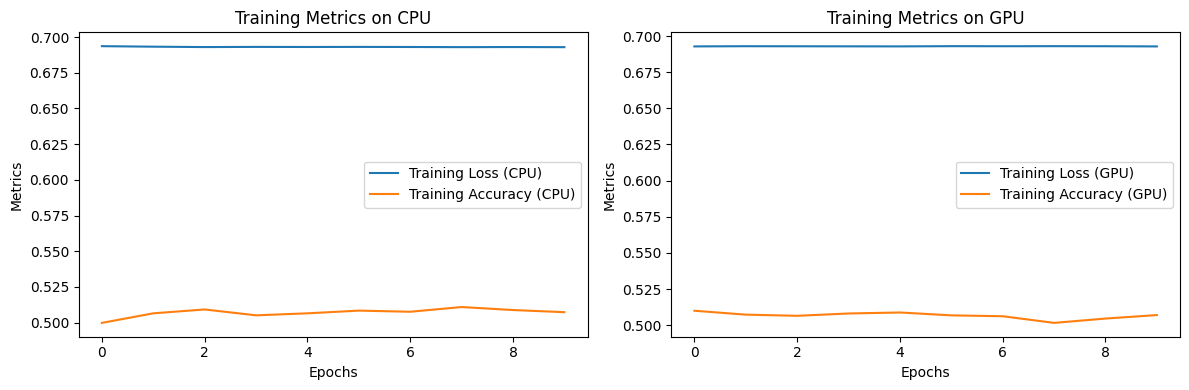

In [7]:
import matplotlib.pyplot as plt

# Plotting training history (loss and accuracy)
plt.figure(figsize=(12, 4))

# Plot CPU training history
plt.subplot(1, 2, 1)
plt.plot(cpu_history.history['loss'], label='Training Loss (CPU)')
plt.plot(cpu_history.history['accuracy'], label='Training Accuracy (CPU)')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training Metrics on CPU')
plt.legend()

# Plot GPU training history if available
if tf.test.is_gpu_available():
    plt.subplot(1, 2, 2)
    plt.plot(gpu_history.history['loss'], label='Training Loss (GPU)')
    plt.plot(gpu_history.history['accuracy'], label='Training Accuracy (GPU)')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Training Metrics on GPU')
    plt.legend()

plt.tight_layout()
plt.show()